## Credit Card Fraud Detection using Logistic Regression


## Objective
Develop a machine learning model to accurately detect fraudulent credit card transactions, minimizing financial losses and increasing transaction security.

## Goals
Build and compare ML models for fraud detection.
Handle class imbalance and optimize for real-world performance.
Maximize recall and precision, minimizing missed frauds and false positives.
Evaluate models using a range of performance metrics.
Ensure the system can adapt to new fraud patterns.

## Tools: 
Python, Pandas, Scikit-learn, Matplotlib

In [54]:
##import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, average_precision_score,accuracy_score
import matplotlib.pyplot as plt



In [55]:
# load the dataset
credit_card_data=pd.read_csv(r"C:\Users\varma\creditcard.csv")
credit_card_data.head() # load first 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [56]:
credit_card_data.tail()  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## EXPLORATORY DATA ANALYSIS

In [57]:
# dataset information
credit_card_data.info()   #helps to understand data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [58]:
credit_card_data.shape

(284807, 31)

In [59]:
## checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Rows:2,84,807
columns:31
There is no null values

In [60]:
credit_card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [61]:
# distribution of legit transactions and fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

The dataset is highly unbalanced

0---->Legitmate transactions(284315)
1---->Fradulent transactions(492)

In [62]:
# Separate data based on the 'Class' column for analysis
legit = credit_card_data[credit_card_data['Class'] == 0]
fraud = credit_card_data[credit_card_data['Class'] == 1]


In [63]:
print("Shape of legitimate transactions:", legit.shape)
print("Shape of fraudulent transactions:", fraud.shape)

Shape of legitimate transactions: (284315, 31)
Shape of fraudulent transactions: (492, 31)


In [64]:
# statistical details 
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [65]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [66]:
## compare the values of both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## UNIVARIATE ANALYSIS

C:\Users\varma\AppData\Local\Temp\ipykernel_13924\3797532903.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([legit['Amount'], fraud['Amount']], labels=['Legit', 'Fraud'])


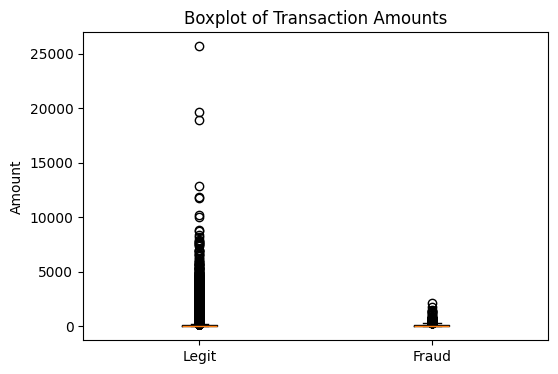

In [67]:
# visually fraud and legit transactions
plt.figure(figsize=(6,4))
plt.boxplot([legit['Amount'], fraud['Amount']], labels=['Legit', 'Fraud'])
plt.title('Boxplot of Transaction Amounts')
plt.ylabel('Amount')
plt.show()


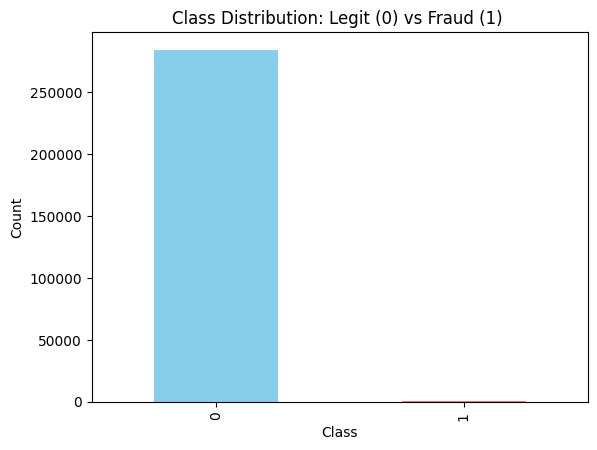

In [68]:
credit_card_data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: Legit (0) vs Fraud (1) ')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


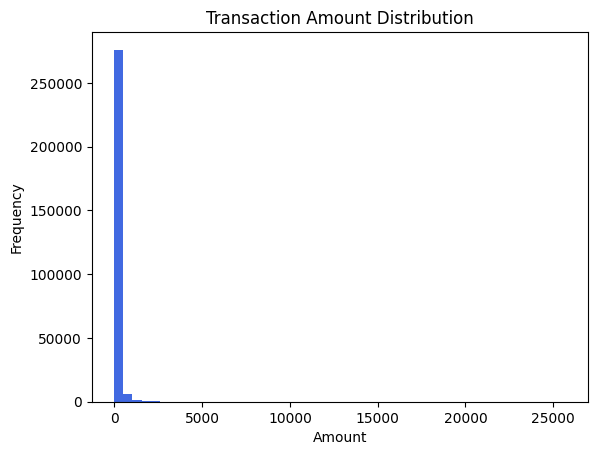

In [69]:
plt.hist(credit_card_data['Amount'], bins=50, color='royalblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


## correlation
Logistic regression assumes that independent variables are not highly correlated.
So checking correlation helps you detect and fix multicollinearity early.

In [70]:
credit_card_data.corr()["Class"].sort_values(ascending=False)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

## undersampling
more than 2lakhs rows present in one class and 492 classes are present in other so we are using undersampling method.Here we going to build a sample dataset from original dataset containing similar distributions of normal transactions(legit) and fraudlent Transactions.
number of fraudlent transactions:492
Undersampling reduces the number of samples in the majority class (legit) to match the minority class (fraud).
It helps balance the dataset, reduce bias, and improve model performance in imbalanced classification problems like fraud detection.

In [71]:
legit_sample=legit.sample(n=492)   ##randomly take 492 points in the legit 

## concatenating two dataframes
1)legit_sample 2)fraud

In [72]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)   #axis=0 means we are concatenating row wise

In [73]:
new_dataset.head() #class=0 legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213720,139368.0,-0.961670,-0.505998,1.729410,-0.546546,0.093224,-0.165717,0.696484,-0.079196,1.366964,...,0.368980,1.304253,-0.181777,0.024749,0.495317,-0.407215,-0.041593,-0.071585,130.00,0
151526,95636.0,-0.816656,0.777197,1.512476,-0.746865,1.086324,0.671900,0.692225,0.190172,1.202025,...,-0.503997,-1.043073,-0.401193,0.176934,0.745336,0.079092,-0.054156,0.023686,0.01,0
3824,3345.0,1.123958,-0.160379,-0.016553,0.981920,0.135180,0.728155,-0.250357,0.360939,0.423964,...,-0.211792,-0.704646,-0.111868,-1.240002,0.477678,-0.408395,0.014924,0.001989,46.90,0
159643,112756.0,-0.498110,0.239993,-0.042361,0.941416,-3.052635,2.213170,3.365352,-0.472143,-0.887052,...,-0.347591,-0.680835,0.494960,0.728312,-1.221920,1.773888,0.056716,-0.220515,741.26,0
260789,159726.0,0.155681,1.007869,-0.455376,-0.564160,0.933923,-0.790211,0.937555,-0.079961,0.023137,...,-0.354623,-0.888859,0.082771,0.461835,-0.420855,0.120480,0.220099,0.082268,1.29,0


In [74]:
new_dataset.tail()  #class=1 fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


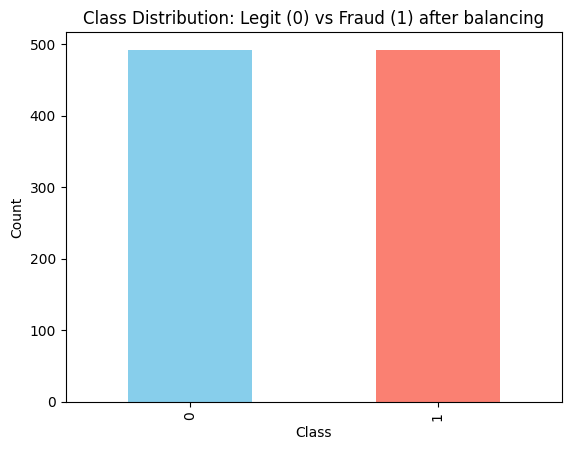

In [75]:
new_dataset['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution: Legit (0) vs Fraud (1) after balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [76]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

Uniformely distributed data

In [77]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93101.250000,-0.001954,0.032425,0.116124,-0.023261,-0.039527,0.038219,-0.057927,0.025063,0.030393,...,0.011881,-0.011130,0.018728,0.024516,-0.008513,0.004882,0.015487,0.024772,0.015840,77.619634
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# separating the data into features and target(0/1)
store all features into x ..here features are time,v1,v2....
classes are store in y variable 

In [78]:
x=new_dataset.drop(columns='Class',axis=1)   #we drop class column axis=1 (columns)
y=new_dataset['Class']

In [79]:
print(x)
print(x.shape)

            Time        V1        V2        V3        V4        V5        V6  \
213720  139368.0 -0.961670 -0.505998  1.729410 -0.546546  0.093224 -0.165717   
151526   95636.0 -0.816656  0.777197  1.512476 -0.746865  1.086324  0.671900   
3824      3345.0  1.123958 -0.160379 -0.016553  0.981920  0.135180  0.728155   
159643  112756.0 -0.498110  0.239993 -0.042361  0.941416 -3.052635  2.213170   
260789  159726.0  0.155681  1.007869 -0.455376 -0.564160  0.933923 -0.790211   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

## split the data into train and test

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [81]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


## Feature scaling/normalization

In [82]:

scaler=RobustScaler
# Fit only on training data
scaler = RobustScaler()
x_train[['Amount', 'Time']] = scaler.fit_transform(x_train[['Amount', 'Time']])
x_test[['Amount', 'Time']] = scaler.transform(x_test[['Amount', 'Time']])

# model training

generally logistice regression are used for binary classification problems.

In [83]:
model=LogisticRegression()

# Training the logistic regression model with training data

In [84]:
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [85]:
#make prdiction
y_pred=model.predict(x_test)

## model evaluation:
we are evaluate model based on accuracy score.try to find accuracy score on trianing data

In [86]:
## accuracy on training data
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [52]:
print("Accuracy on Training Data:",training_data_accuracy)

Accuracy on Training Data: 0.9567979669631512


In [53]:
## accuracy on test data
## makes predictions on unseen test data — to check how well the model learned fraud patterns.
x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [34]:
print("Accuracy on testing data:",testing_data_accuracy)

Accuracy on testing data: 0.9289340101522843


Your model correctly predicted 92.9% of all transactions (both fraud and legitimate).
That’s a strong overall accuracy, but in fraud detection, accuracy alone is not enough — because the dataset is usually imbalanced.

So we must check precision and recall for deeper understanding.

# compare accuracies using different metrics

In [87]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.934010152284264

Confusion Matrix:
 [[96  3]
 [10 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



Overall Performance:
Model performs strongly (≈93%) with balanced precision and recall for both classes.
It detects most fraud cases (90%), and rarely mislabels legit transactions.
Minor Weakness:
10 frauds were missed → might need threshold tuning or class weight adjustment to improve recall slightly.

ROC–AUC and Precision–Recall curves — they focus on class separation and fraud detection quality, not raw accuracy.

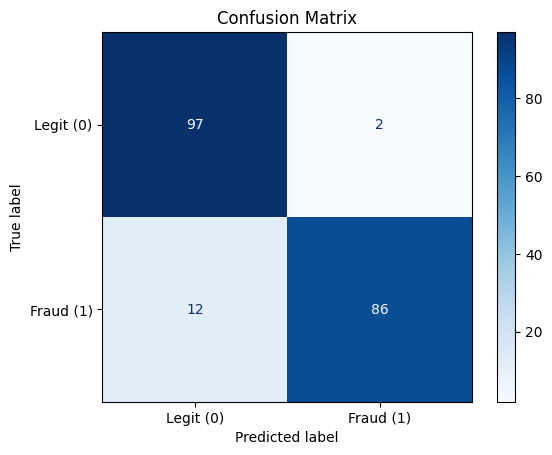

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit (0)', 'Fraud (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


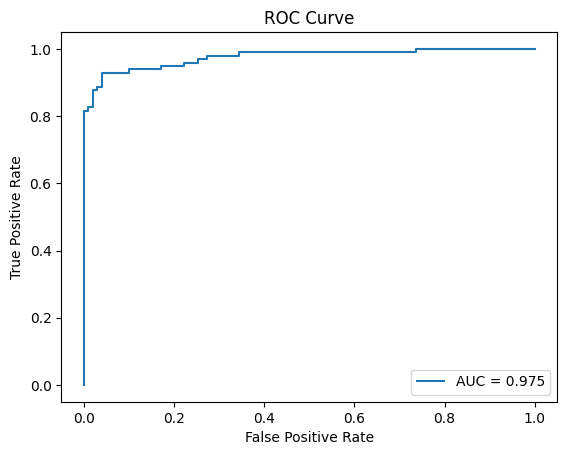

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


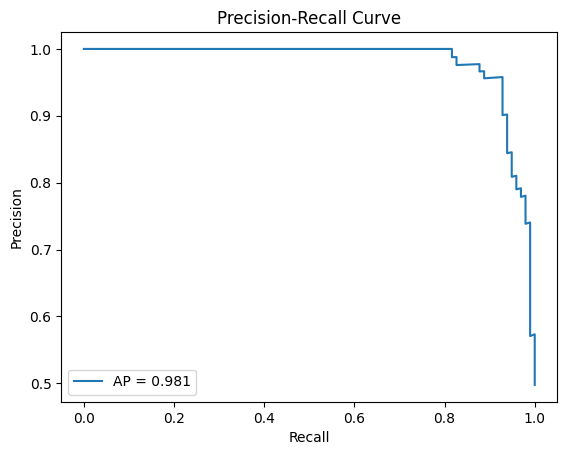

In [37]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
ap = average_precision_score(y_test, y_pred_prob)

plt.plot(recall, precision, label=f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


“During exploratory data analysis, various visualizations were used to understand transaction behavior.
The class distribution plot revealed strong imbalance, while histograms and boxplots highlighted skewness in transaction amounts and distinct fraud patterns.
For evaluation, confusion matrix and ROC/PR curves were used to measure classification performance on the imbalanced data.

                                                     **** THE END ****